<center>
<img src="../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Практический анализ данных и машинное обучение"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: преподаватель Факультета Компьютерных Наук НИУ ВШЭ <br> Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Занятие 7. Задача Обучение без учителя
## <center>Практика. Кластеризация данных с акселерометров и гироскопов мобильных телефонов

**Считываем <a href="https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones">данные</a> Samsung Human Activity Recognition. Они же есть [тут](https://yadi.sk/d/ha-lprkDvozGx).**

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

Populating the interactive namespace from numpy and matplotlib


**Считаем данные, объединим обучающую и тестовую выборки. Метки целевого класса будем использовать для оценки качества кластеризации. Конечно, kMeans не будет ничего о них "знать".**

In [2]:
X_train = np.loadtxt("../../data/samsung_train.txt") 
X_test = np.loadtxt("../../data/samsung_test.txt") 

y_train = np.loadtxt("../../data/samsung_train_labels.txt").astype(int)
y_test = np.loadtxt("../../data/samsung_test_labels.txt").astype(int)

**Для кластеризации объединим выборки.**

In [3]:
X = np.vstack([X_train, X_test])
y = np.hstack([y_train, y_test])

**Опеределим число уникальных значений меток целевого класса. Эти метки соответствуют ходьбе (1), подъему вверх по лестнице (2), спуску по лестнице (3), сидению (4), стоянию (5) и лежанию (6). [Описание](https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names)**

In [4]:
n_classes = len(np.unique(y))
n_classes

6

**Понижаем размерность с помощью PCA, оставляя столько компонент, сколько нужно для того, чтобы объяснить 90% дисперсии.**

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_pca = PCA(n_components=0.9).fit_transform(X_scaled)
X_pca.shape

(10299, 65)

**Визуализируем данные в проекции на первые две главные компоненты. Отчетливо выделяются 2 группы активностей. Можно догадаться, какие именно.**

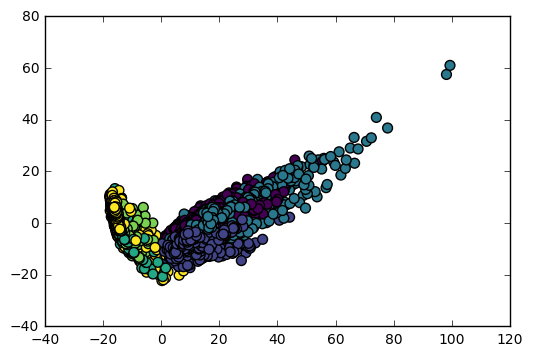

In [6]:
scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=50, cmap='viridis');

**Сделайте кластеризацию данных (выделенных 65 главных компонент) методом KMeans. Задайте параметр *n_clusters*, равный *n_classes* - найденному ранее числу уникальных меток целевого класса.**

In [ ]:
%%time
kmeans = KMeans # Ваш код здесь
cluster_labels = # Ваш код здесь

**Визуализируйте данные в проекции на первые две главные компоненты. Раскрасьте точки в соответсвии с полученными метками кластеров.**

In [ ]:
scatter # Ваш код здесь

**Посмотрите на соответствие между метками кластеров и исходными метками классов. Посмотрите, какие виды активностей алгоритм KMeans путает.**

In [ ]:
from pandas import crosstab
tab = crosstab(y, cluster_labels, margins=True)
tab.index = ['walk', 'up', 'down', 'sit', 'stand', 'lay', 'all']
tab.columns = ['cluster' + str(i) for i in range(n_classes)] + ['all']
tab

**Посчитайте метрики качества кластеризации ARI, AMI, гомогенность, полноту и силуэт.**

In [ ]:
from sklearn import metrics

print('ARI =', # Ваш код здесь
print('AMI =', # Ваш код здесь
print('Homogeneity =', # Ваш код здесь
print('Completeness =', # Ваш код здесь
print('V-measure =',  # Ваш код здесь
print('Silhouette =',  # Ваш код здесь

**Видно, что kMeans хорошо отличает только группы активностей – 1 группа: walk, walk up, walk down, 2 группа: sit, stand, lay. Попробуйте искать не 6, а 2 кластера. Посмотрите теперь на качество кластеризации и прокомментируйте результат.**

In [ ]:
y_walk = (y <= 3).astype('int')

In [ ]:
%%time
two_clusters_labels = KMeans # Ваш код здесь

In [ ]:
tab2 = crosstab(y_walk, two_clusters_labels, margins=True)
tab2.index = ['walk/up/down', 'sit/stand/lay', 'all']
tab2.columns = ['cluster1', 'cluster2', 'all']
tab2

In [ ]:
print('ARI =', # Ваш код здесь
print('AMI =', # Ваш код здесь
print('Homogeneity =', # Ваш код здесь
print('Completeness =', # Ваш код здесь
print('V-measure =',  # Ваш код здесь
print('Silhouette =',  # Ваш код здесь

### Многоклассовая классификация
**Видим, что выделять 6 кластеров на этих данных хорошо не получается. Хорошо отделяются только ходьба (простая, вверх и вниз) от остальных активностей. Зато задача неплохо решается как задача классификации.**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

**Отмасштабируйте выборку X_train, выделите в ней столько главных компонент, чтоб оставить 90% дисперссии, проведите соответсвующее преобразование с тестовой выборкой X_test**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Ваш код здесь
X_train_scaled = # Ваш код здесь
X_train_pca = # Ваш код здесь
print(X_train_pca.shape)

X_test_pca = # Ваш код здесь
print(X_test_pca.shape)

**Будем обучать лес на исходных признаках и на главных компонентах.**

In [ ]:
forest = RandomForestClassifier(n_estimators=100, 
                                random_state=7, n_jobs=-1,
                                oob_score=True)
forest_pca = RandomForestClassifier(n_estimators=100, 
                                random_state=7, n_jobs=-1,
                                oob_score=True)

**Обучите лес на главных компонентах, посмотрите OOB-оценку качества.**

In [ ]:
# Ваш код здесь

**Обучите лес на всех признаках, посмотрите OOB-оценку качества.**

In [ ]:
# Ваш код здесь

**Сравните качество (долю правильных ответов и F1 с макро-усреднением) на тестовой выборке для леса, обученного на всех признаках, и для леса, обученного на главных компонентах. Посмотрите также на матрицы ошибок.**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [ ]:
forest_pca_pred = # Ваш код здесь
print(accuracy_score(y_test, forest_pca_pred))
print(f1_score(y_test, forest_pca_pred, average='macro'))

In [ ]:
confusion_matrix(y_test, forest_pca_pred)

In [ ]:
forest_pred = # Ваш код здесь
print(accuracy_score(y_test, forest_pred))
print(f1_score(y_test, forest_pred, average='macro'))

In [ ]:
confusion_matrix(y_test, forest_pred)

**Проверьте аналогично линейный SVM на всех признаках. Настройте параметр C с помощью GridSearchCV.**

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

In [ ]:
svm = LinearSVC()
svm_params = {'C': np.logspace(-2, 2, 10)}

In [ ]:
best_svm = GridSearchCV # Ваш код здесь
# Ваш код здесь

In [ ]:
svm_pred = # Ваш код здесь
print(accuracy_score(y_test, svm_pred))
print(f1_score(y_test, svm_pred, average='macro'))

In [ ]:
confusion_matrix(y_test, svm_pred)